# Traffic Signs Recognition using CNN & Keras

In [134]:
!pip install tensorflow keras sklearn matplotlib pandas pil


  Using cached sklearn-0.0.tar.gz (1.1 kB)

ERROR: Could not find a version that satisfies the requirement pil
ERROR: No matching distribution found for pil


In [135]:
!pip install opencv-python

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [74]:
import cv2
import numpy as np
import pandas as pd
from glob import glob
import tensorflow as tf
from datetime import datetime
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\LENOVO'

In [4]:
cd C:\Users\LENOVO\Desktop\DataSets\Train

C:\Users\LENOVO\Desktop\DataSets\Train


In [5]:
os.getcwd()

'C:\\Users\\LENOVO\\Desktop\\DataSets\\Train'

In [31]:
# loading dataset
data = []
labels = []
classes = 43
cur_path = os.getcwd()

for i in os.listdir(cur_path):
    dir = cur_path + '/' + i
    for j in os.listdir(dir):
        img_path = dir+'/'+j
        img = cv2.imread(img_path,-1)
        img = cv2.resize(img, (30,30), interpolation = cv2.INTER_NEAREST)
        data.append(img)
        labels.append(i)
        
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(40048, 30, 30, 3) (40048,)


In [32]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(40048, 30, 30, 3) (40048,)
(32038, 30, 30, 3) (8010, 30, 30, 3) (32038,) (8010,)


In [33]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 44)
y_test = to_categorical(y_test, 44)

In [34]:
y_train.shape, y_test.shape

((32038, 44), (8010, 44))

# Show Datasets in CSV Formet

In [35]:
train_data=pd.read_csv('C:\\Users\LENOVO\Desktop\DataSets\Train.csv',usecols=['ClassId','Path','Width','Height'],)
test_data=pd.read_csv('C:\\Users\LENOVO\Desktop\DataSets\Test.csv',usecols=['ClassId','Path','Width','Height'],)

train_data.rename({'ClassId':'label','Path':'path'},inplace=True,axis=1)
test_data.rename({'ClassId':'label','Path':'path'},inplace=True,axis=1)

train_data.head()




,Width,Height,label,path
0,27,26,20,Train/20/00020_00000_00000.png
1,28,27,20,Train/20/00020_00000_00001.png
2,29,26,20,Train/20/00020_00000_00002.png
3,28,27,20,Train/20/00020_00000_00003.png
4,28,26,20,Train/20/00020_00000_00004.png


In [36]:
test_data.head()



,Width,Height,label,path
0,53,54,16,Test/00000.png
1,42,45,1,Test/00001.png
2,48,52,38,Test/00002.png
3,27,29,33,Test/00003.png
4,60,57,11,Test/00004.png


In [37]:
print('NO. of classes')
print(train_data['label'].nunique())

NO. of classes
43


In [38]:
cd C:\Users\LENOVO\Desktop\DataSets

C:\Users\LENOVO\Desktop\DataSets


# Let's Visualize the testing Data

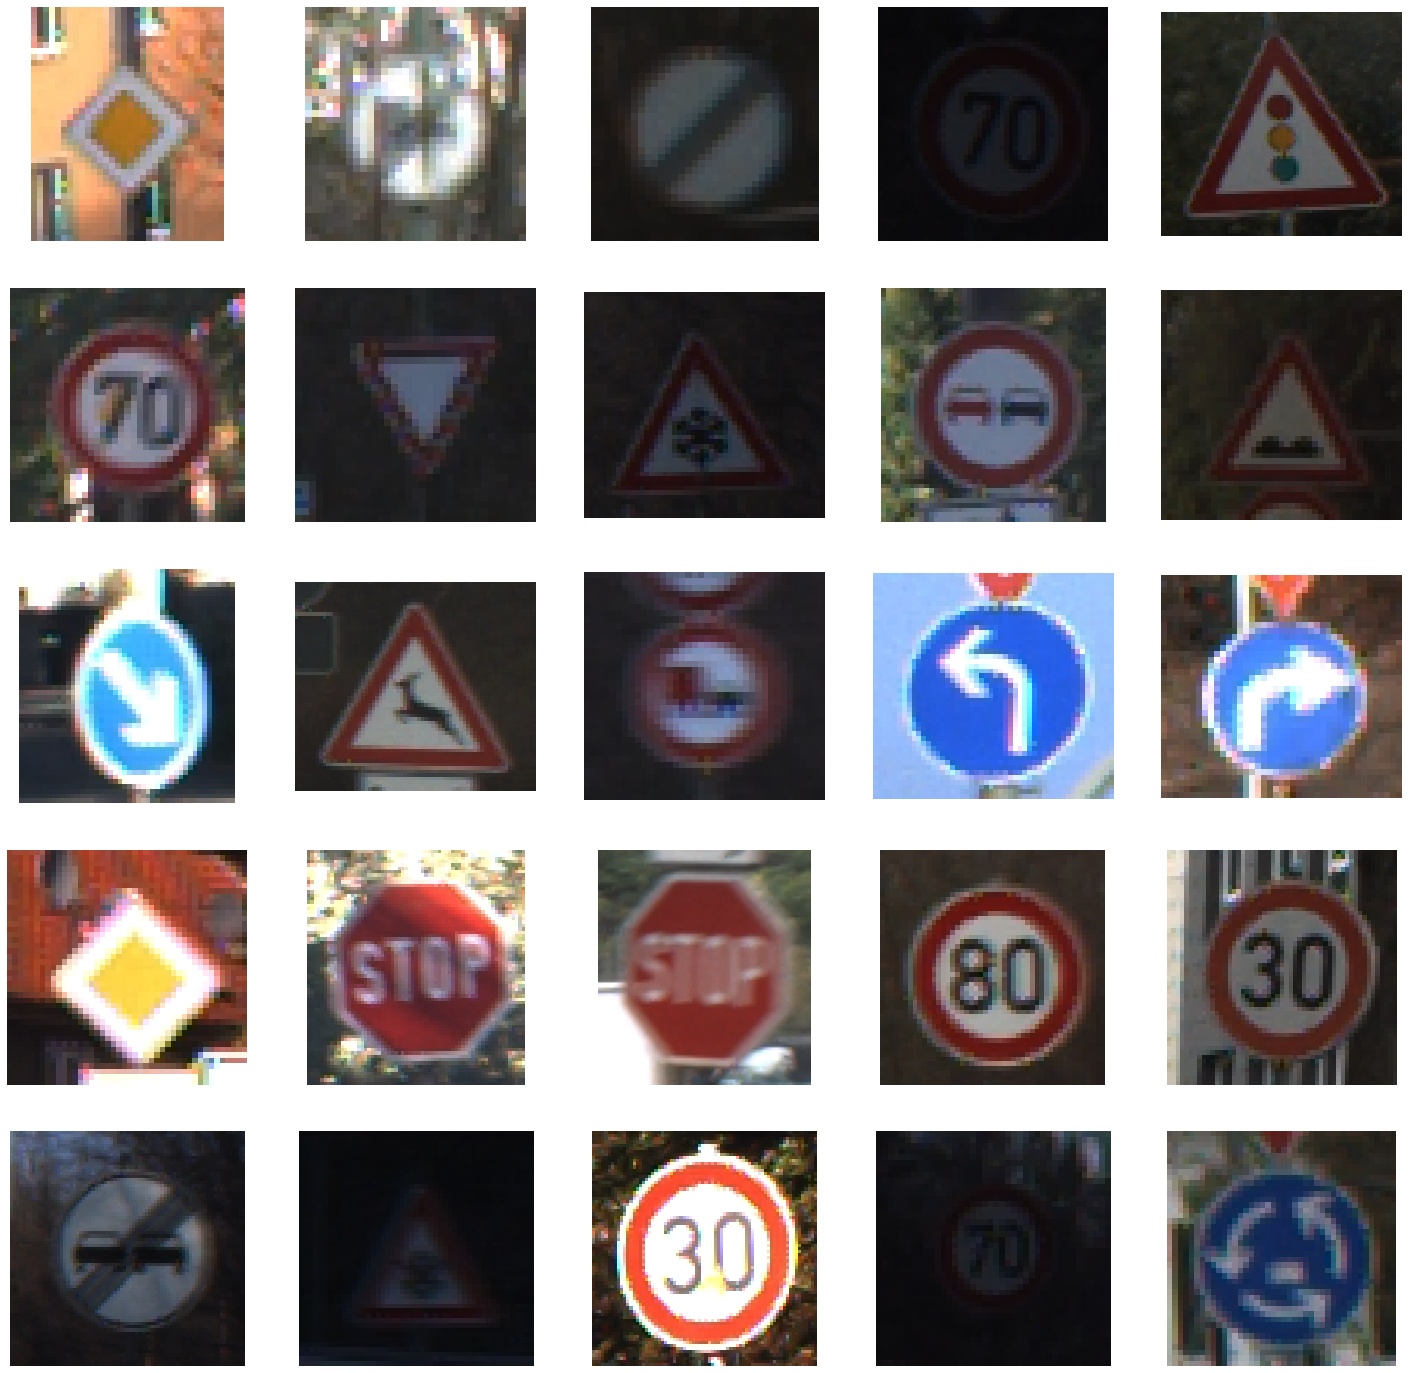

In [39]:
import random
from matplotlib.image import imread
data_dir= os.getcwd()
imgs=test_data['path'].values
plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_image_path=data_dir+'/'+random.choice(imgs)
    random_image=imread(random_image_path)
    plt.imshow(random_image)
    plt.grid(b=None)
    plt.axis('off')
    plt.xlabel(random_image.shape[0],fontsize=20)
    plt.ylabel(random_image.shape[0],fontsize=20)
    
    


In [40]:
cd C:\\Users\LENOVO\Desktop\DataSets\Train

C:\Users\LENOVO\Desktop\DataSets\Train


# Let's Visualize the Training Datasets in Sorted grids formet

Text(0, 0.5, 'Number of images')

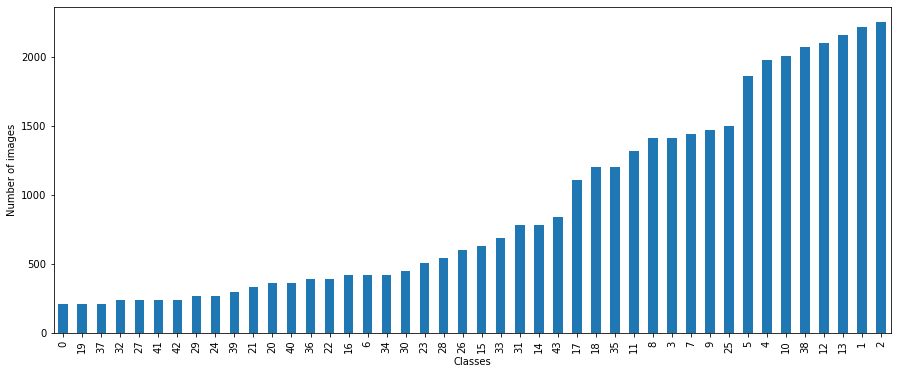

In [41]:
# number of images in each class
data_dic = {}
for folder in os.listdir(cur_path):
    data_dic[folder] = len(os.listdir(cur_path + '/' + folder))

data_df= pd.Series(data_dic)
plt.figure(figsize = (15, 6))
data_df.sort_values().plot(kind = 'bar')
plt.xlabel('Classes')
plt.ylabel('Number of images')

# Build a VGG16 model



In [65]:
#Building the model


y_train=tf.keras.utils.to_categorical(y_train, num_classes=7)

vgg16 = VGG16(input_shape = [64,64,3], weights='imagenet', include_top=False)


for layer in vgg16.layers:
      layer.trainable = False


x = Flatten()(vgg16.output)
y = Dense(7, activation='softmax')(x)

model = Model(inputs = vgg16.input, outputs = y)

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [66]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0   

In [28]:
!pip install visualkeras
import visualkeras

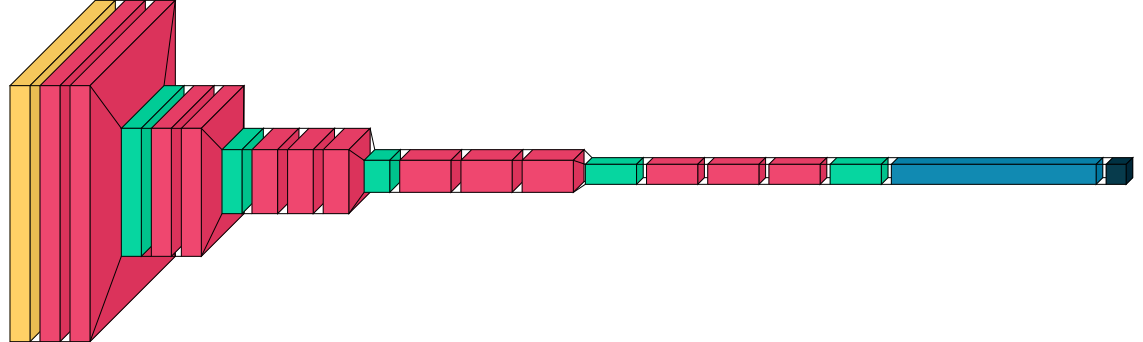

In [67]:
visualkeras.layered_view(model)

# Train and validate the model

In [60]:
#Compilation of the model

vgg_16_model = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/20
1002/1002 [==============================] - 76s 75ms/step - loss: 1.9196 - accuracy: 0.4577 - val_loss: 0.5111 - val_accuracy: 0.8589
Epoch 2/20
1002/1002 [==============================] - 82s 82ms/step - loss: 0.5238 - accuracy: 0.8426 - val_loss: 0.2230 - val_accuracy: 0.9356
Epoch 3/20
1002/1002 [==============================] - 86s 85ms/step - loss: 0.3380 - accuracy: 0.9035 - val_loss: 0.0893 - val_accuracy: 0.9724
Epoch 4/20
1002/1002 [==============================] - 86s 86ms/step - loss: 0.2687 - accuracy: 0.9237 - val_loss: 0.0968 - val_accuracy: 0.9725
Epoch 5/20
1002/1002 [==============================] - 88s 88ms/step - loss: 0.2530 - accuracy: 0.9310 - val_loss: 0.1409 - val_accuracy: 0.9623
Epoch 6/20
1002/1002 [==============================] - 89s 89ms/step - loss: 0.2396 - accuracy: 0.9350 - val_loss: 0.1062 - val_accuracy: 0.9700
Epoch 7/20
1002/1002 [==============================] - 88s 88ms/step - loss: 0.2285 - accuracy: 0.9387 - val_loss: 0.0688 -

In [17]:
import cv2
import numpy as np
import pandas as pd
from glob import glob
import tensorflow as tf
from datetime import datetime
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [20]:
y_train=tf.keras.utils.to_categorical(y_train, num_classes=44)


vgg16 = VGG16(input_shape = [32,32,3], weights='imagenet', include_top=False)


for layer in vgg16.layers:
      layer.trainable = False


x = Flatten()(vgg16.output)
y = Dense(44, activation='softmax')(x)




model = Model(inputs = vgg16.input, outputs = y)

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

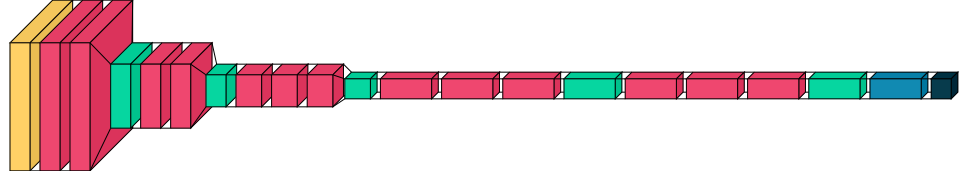

In [29]:
visualkeras.layered_view(model)

In [ ]:
vgg_16_model = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Plotting graphs for accuracy 

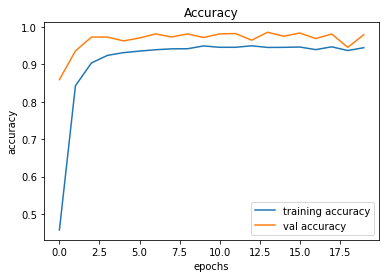

In [70]:
#plotting graphs for accuracy 
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

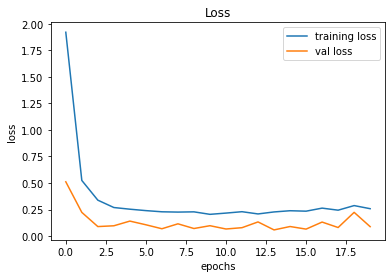

In [71]:

plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Evalution


In [ ]:
# Score
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss', score[0])
print('Test accuracy', score[1])

In [ ]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

In [ ]:

from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_class, y_pred_class)
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.savefig('h1.png')

In [ ]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred_class,y_test_class)
score

In [73]:
model.save('traffic_classifier.h5')

# Build the Simple App Using Tkinter

In [ ]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

import numpy
#load the trained model to classify sign
from keras.models import load_model
model = load_model('traffic_classifier1.h5')

#dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons',
            44:'non traffic images'}

#initialise GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Traffic sign classification')
top.configure(background='#CDCDCD')

label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)

def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    predict_x=model.predict(image)
    classes_x=numpy.argmax(predict_x,axis=1)
    sign = classes[int(classes_x)+1]
    print(sign)
    label.configure(foreground='#011638', text=sign) 

def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)

def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/4.25),(top.winfo_height()/4.25)))
        im=ImageTk.PhotoImage(uploaded)

        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

upload=Button(top,text="Upload an image",command=upload_image,padx=30,pady=10)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))

upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()